In [1]:
import matplotlib.pyplot as plt
import numpy as np

from typing import List, Tuple
from matplotlib.animation import FuncAnimation

import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display

%matplotlib notebook
%matplotlib inline

In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
from speedypanther.synthesis.wave_generation import sample_sinewave, sample_complex_wave, generate_impulse_train, generate_noise

## Plot a simple waveform

In [4]:
def plot_waveform(timesteps: np.ndarray, samples: np.ndarray):
    plt.plot(timesteps, samples)

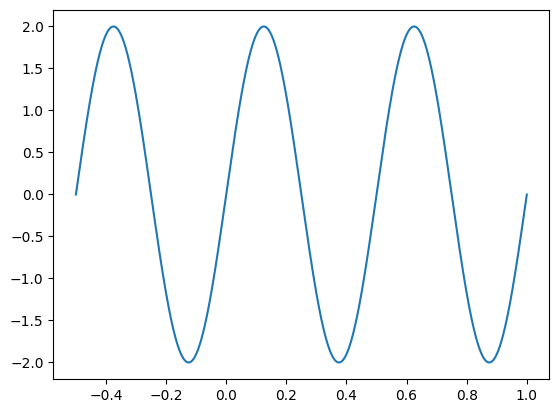

In [5]:
timesteps, samples = sample_sinewave(2, start_time = -0.5, end_time=1.0, amplitude=2)
plot_waveform(timesteps, samples)

In [6]:
@widgets.interact_manual(
    freq=(0, 100), amplitude=(0.0, 50.0), color=['blue', 'red', 'green'], lw=(1., 10.))
def plot_waveform_interactive(freq=1., amplitude=1.0, color='blue', lw=1, grid=True):
    timesteps, samples = sample_sinewave(freq, start_time = 0.0, end_time=1.0, amplitude=amplitude)
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.plot(timesteps, samples,
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(IntSlider(value=1, description='freq'), FloatSlider(value=1.0, description='amplitude', …

## Plot a complex waveform

In [7]:
complex_timesteps, complex_samples = sample_complex_wave(frequencies=[2, 7, 20], coeffs=[0.3, 0.4, 0.3], end_time=4.0)

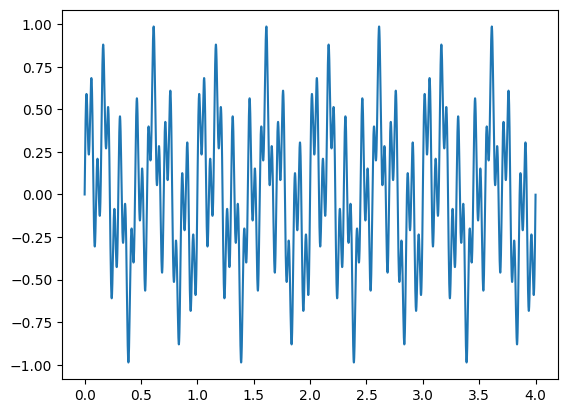

In [8]:
plot_waveform(complex_timesteps, complex_samples)

In [9]:
@widgets.interact_manual(
    freq1=(0, 100),
    freq2=(0, 100),
    freq3=(0, 100),
    coeff1=(0.0, 1.0),
    coeff2=(0.0, 1.0),
    coeff3=(0.0, 1.0))
def plot_complex_waveform_interactive(freq1=1, freq2=1, freq3=1, coeff1=0.33, coeff2=0.33, coeff3=0.33, grid=True):
    """
    Currently supports 3 waveforms mixed together.
    """
    freqs = [freq1, freq2, freq3]
    coeffs = [coeff1, coeff2, coeff3]
    timesteps, samples = sample_complex_wave(freqs, coeffs)
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    plt.ylim([-1.05, 1.05])
    ax.plot(timesteps, samples)
    ax.grid(grid)

interactive(children=(IntSlider(value=1, description='freq1'), IntSlider(value=1, description='freq2'), IntSli…

In [10]:
def plot_impulse_train(timesteps: np.ndarray, samples: np.ndarray):
    amplitude = samples.max()
    plt.ylim([-amplitude - amplitude * 0.1, amplitude + amplitude * 0.1])
    plt.scatter(timesteps, samples)

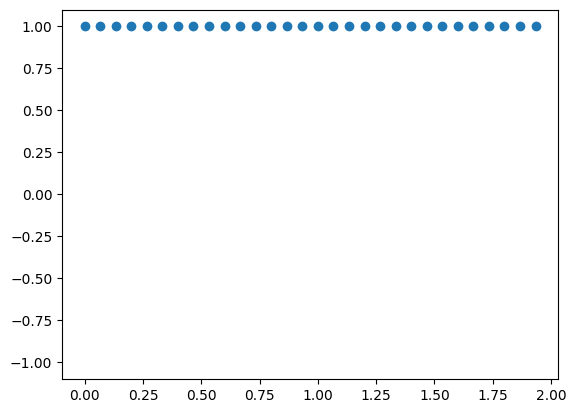

In [11]:
train_timesteps, train_samples = generate_impulse_train(15, end_time=2.0)
plot_impulse_train(train_timesteps, train_samples)

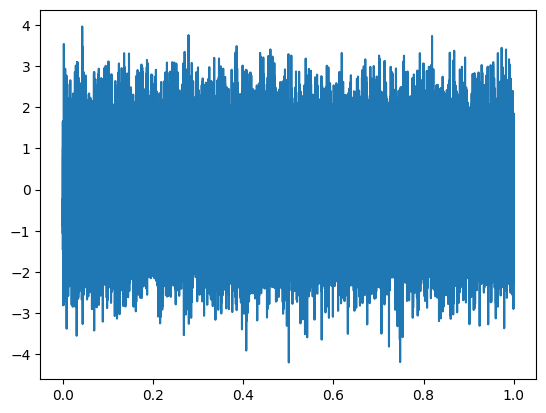

In [12]:
noise_timesteps, noise_samples = generate_noise()
plot_waveform(noise_timesteps, noise_samples)

In [17]:
def dft(sample_window: np.ndarray, duration: float = 0., sample_rate: int = 44_100):
    """
    The discrete Fourier Transform to move a signal from the time domain to the 
    frequency domain.
    
    sample_window: A window from a signal on which DFT is performed.
    duration: The duration of the sample_window in seconds.
    """
    n_samples = sample_window.shape[0]
    
    